## Метод стрельбы

$$\begin{equation*}
 \begin{cases}
   y''(x)=p(x)y'(x)+q(x)y(x)+f(x), 
   \\
   y(a) = A, y(b) = B,
 \end{cases}
\end{equation*}$$
Рассмотрим две системы: 
$\begin{equation*}
 \begin{cases}
   y''_1(x)=p(x)y'_1(x)+q(x)y_1(x)+f(x), 
   \\
   y_1(a) = A, y'_1(a) = 0,
 \end{cases}
\end{equation*}$ 
$\begin{equation*}
 \begin{cases}
   y''_2(x)=p(x)y'_2(x)+q(x)y_2(x), 
   \\
   y_2(a) = 0, y'_2(a) = 1,
 \end{cases}
\end{equation*}$


Тогда искомое решение $$y(x)=y_1(x)+\frac{B - y_1(b)}{y_2(b)}y_2(x)$$

$$y''-(10+x^2)y=xe^{-x}, 0<x<10$$\\
$$y_1(x), y_2(x)-\text{Находим методом Рунге-Кутты}$$

[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4]


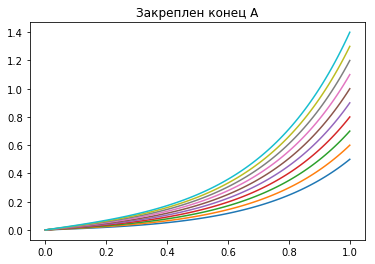

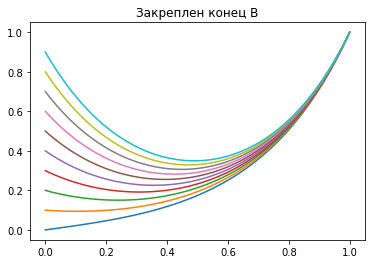

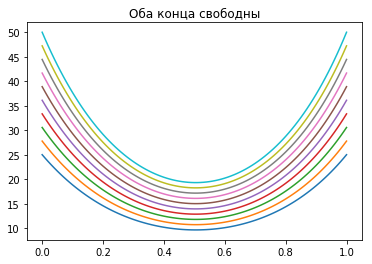

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt


def p(x):   return 0

def q(x):  
    return -(10+(x)**2)

def f(x):   return  (math.exp(-x)*x)

def get_c1(B, y):
    global n
    return (B - y[0][n]) / y[1][n]

def get_solv_y_i(i, B, y): return y[0][i] + get_c1(B, y) * y[1][i]

def div(a, b):
    return a / b

def solution(A, B, n):
    h = 1.0 / n
    a = 1.0
    x = np.arange(0, 1.000001, h)
    D0, D1 = A , h
    y = [[A, D0], [0, D1]]
    for i in range(1, n):
        y[0].append(
            div(
                (h ** 2 * f(x[i]) - (1.0 - (h / 2) * p(x[i])) * y[0][i - 1] - (h ** 2 * q(x[i]) - 2) * y[0][i]),
                1 + h / 2 * p(x[i])
            )
        )
        y[1].append(
            div(
                -(1.0 - h / 2 * p(x[i])) * y[1][i - 1] - (h ** 2 * q(x[i]) - 2) * y[1][i],
                1 + h / 2 * p(x[i])
            )
        )
    plt.plot(x, [get_solv_y_i(i, B, y) for i in range(n + 1)])

#     for i in range(n):
#         print(x[i], get_solv_y_i(i, B, y))
n = 100
A = 0.0
B_full = np.linspace(0.5, 1.4, 10)
print(B_full)
for B in B_full:
    solution(A, B, n)
plt.title("Закреплен конец А")
plt.show()
B = 1.0
A_full = np.linspace(0.0, 0.9, 10)
for A in A_full:
    solution(A, B, n)
plt.title("Закреплен конец В")
plt.show()
A_full = np.linspace(25, 50, 10)
B_full = np.linspace(25, 50, 10)
for i in range(10):
    solution(A_full[i], B_full[i], n)
plt.title("Оба конца свободны")
plt.show()